In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # calculate distance matrix
from scipy.linalg import lu # calculate LU decomposition
from scipy.optimize import minimize # minimization of scalar function

# 1. Generate $Y$

## 1-1. Distance matrix

 $ d_{ij} = ||X_i - X_j||$

In [2]:
# function that makes coordincates of data points
def make_coords(N_points, xmu, xsd, ymu, ysd):
  x_coords = np.random.normal(xmu, xsd, size=N_points)
  y_coords = np.random.normal(ymu, ysd, size=N_points)
  coords = np.column_stack((x_coords, y_coords))

  return coords

In [3]:
# function that calculates distances between coordinates
def distances(coords):
  distances = cdist(coords, coords, metric='Euclidean')

  return distances

In [4]:
np.random.seed(24)

In [5]:
# set parameters
p = 1000 # dimensionaltiy

In [6]:
# get coordinates
coord = [0, 1, 0, 1] # xmu, xsd, ymu, ysd
X = make_coords(p, *coord)

In [7]:
# get distance matrix
d = distances(X)
d.shape

(1000, 1000)

## 1-2. Covariance Matrix $\Sigma$
$ \Sigma = Cov(Y_i, Y_j|X) = \theta_1 \exp(-\frac{1}{\theta_2} d_{ij}) $

In [8]:
# function that makes covariance matrix Sigma
def Sigma(param, dis):
  theta1, theta2 = param[0], param[1]
  cov = theta1*np.exp((-1/theta2)*dis) # distance matrix is a square matrix
  return cov

In [9]:
# set parameter for Sigma
paramTrue = [1, 1/2]
SigmaTrue = Sigma(paramTrue, d)

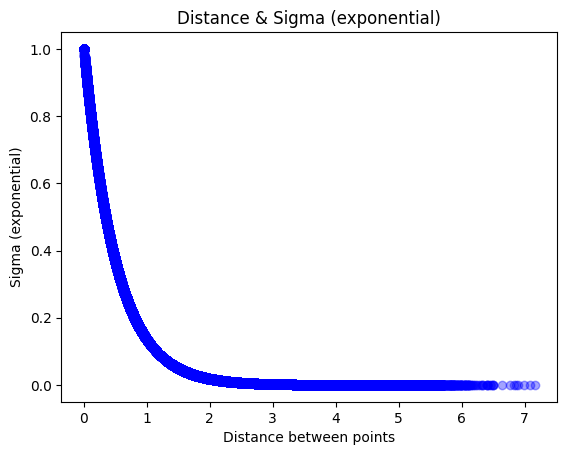

In [10]:
# plotting
d_plot = d.reshape((p*p,))
Sigma_plot = SigmaTrue.reshape((p*p,))
data = pd.DataFrame({'Distances': d_plot, 'Sigma(exp)': Sigma_plot})

plt.scatter(data['Distances'], data['Sigma(exp)'], c='blue', alpha=0.2)
plt.ylabel('Sigma (exponential)')
plt.xlabel('Distance between points')
plt.title('Distance & Sigma (exponential)')
plt.show()

# 1-3. Generate data $Y$
* $ Y = \Sigma^{1/2} \cdot U $
  * $\Sigma$ is positive semi definite
  * $U \sim N(0, I_p)$

* Dataframe of $Y$ ; N $\times$ p
  * Size: N = 1000
  * Dimensionality: p = 1000







In [11]:
# get sigmahalf
## cf. check if SigmaTrue is positive definite
pd = np.linalg.eig(SigmaTrue)[0].min() > 0
if pd:
    SigmaHalf = np.linalg.cholesky(SigmaTrue)
    print('Covariance matrix is positive definite')
else:
    print('Covariance matrix is not positive definite')

Covariance matrix is positive definite


In [30]:
N = 1000 # size

results = []

for i in range(N):
  U = np.random.normal(0, 1, p).reshape(p, 1)
  results.append(np.dot(SigmaHalf, U))

col_names = ['y{}'.format(i+1) for i in range(p)]
y_df = pd.DataFrame(np.reshape(results, (N, p)), columns=col_names)

# 2. Calculated Covariance


In [31]:
cov = np.cov(y_df.T) # cf. np.cov; each row represents variavble, each column a single observation
cov.shape

(1000, 1000)

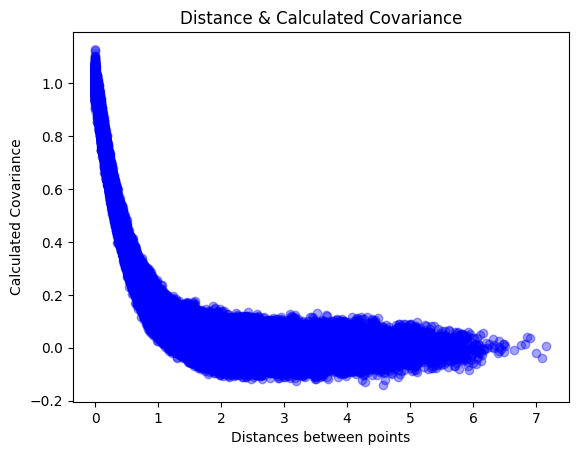

In [33]:
# plotting
d_plot = d.reshape((p*p,)) # distance matrix
cov_plot = cov.reshape((p*p, ))
data = pd.DataFrame({'Distances': d_plot, 'Calculated Covariance': cov_plot})

plt.scatter(data['Distances'], data['Calculated Covariance'], c='blue', alpha=0.2)
plt.ylabel('Calculated Covariance')
plt.xlabel('Distances between points')
plt.title('Distance & Calculated Covariance')
plt.show()